In [1]:
%matplotlib inline

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

# Tree and Ensemble Methods Demos

## Impurity measures

In [123]:
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
def gini_index(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))
def misclassification_error(p):
    return 1 - np.max([p, 1 - p])

In [124]:
prob_of_class_one = np.linspace(0, 1, 100)

C:\Users\a1056968\AppData\Local\Temp\ipykernel_20292\1385797121.py:2: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2((1 - p))
C:\Users\a1056968\AppData\Local\Temp\ipykernel_20292\1385797121.py:2: RuntimeWarning: invalid value encountered in multiply
  return -p * np.log2(p) - (1 - p) * np.log2((1 - p))


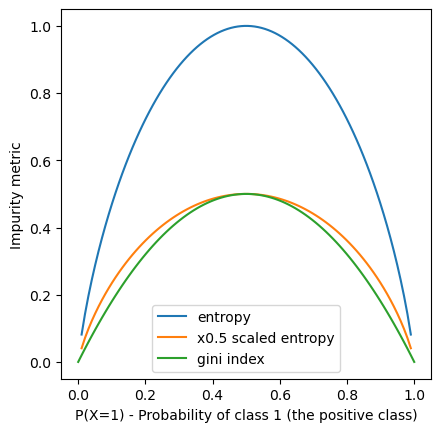

In [132]:
plt.plot(prob_of_class_one, entropy(prob_of_class_one), label = "entropy")
plt.plot(prob_of_class_one, 0.5 * entropy(prob_of_class_one), label="x0.5 scaled entropy")
plt.plot(prob_of_class_one, gini_index(prob_of_class_one), label="gini index")
# plt.plot(prob_of_class_one, misclassification_error(prob_of_class_one))

plt.gca().set_aspect("equal")
plt.xlabel("P(X=1) - Probability of class 1 (the positive class)")
plt.ylabel("Impurity metric")
plt.legend()
plt.show()

## Visualizing decision tree boundaries

In [3]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [5]:
h = 0.02 # Step size

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

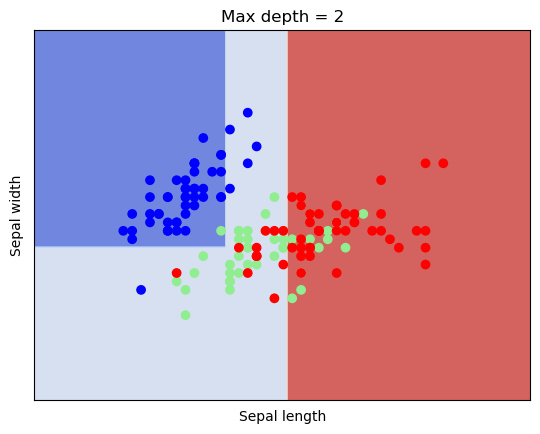

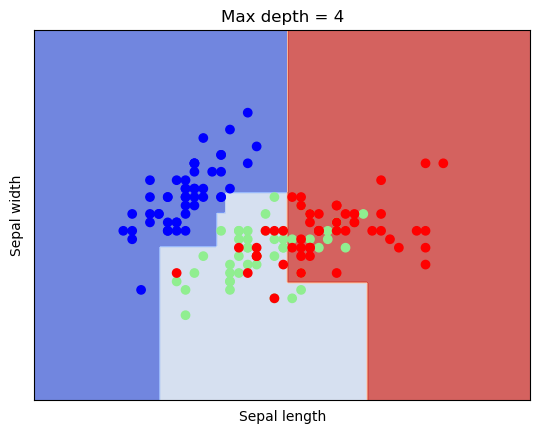

In [6]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

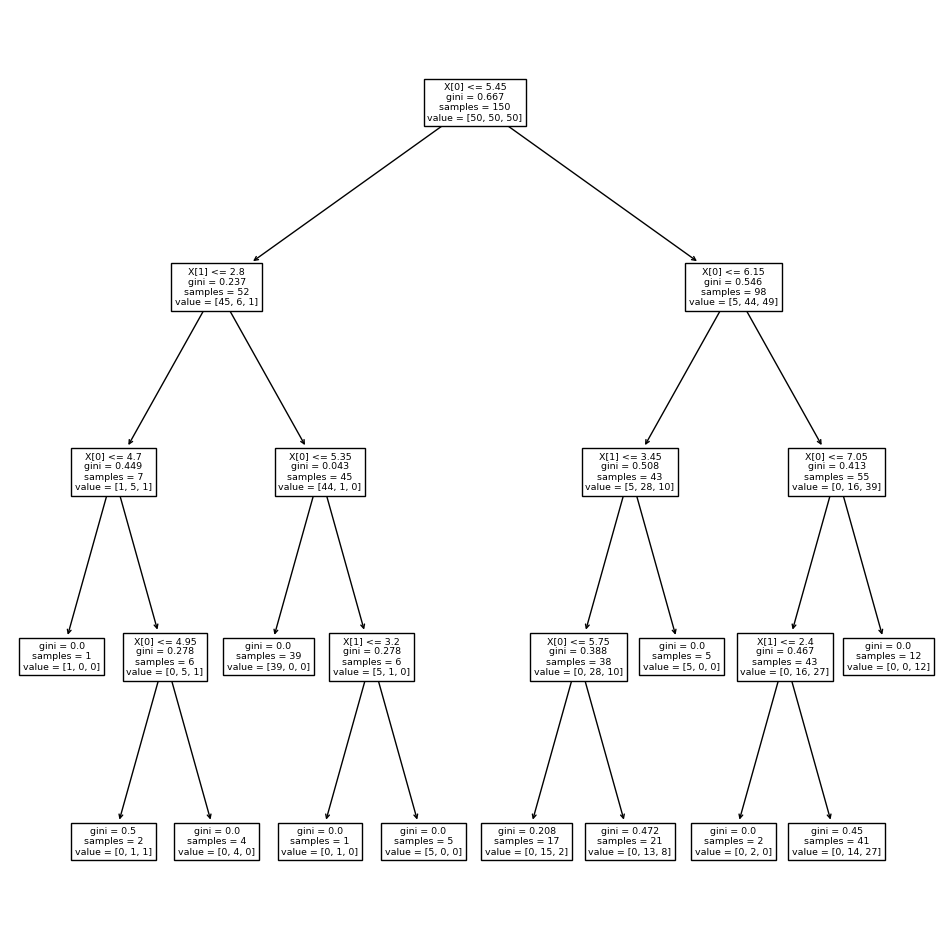

In [135]:
plt.figure(figsize=(12,12))
plot_tree(depth_4)
plt.show()

In [136]:
samples_first_node = 150
samples_sorted_in_class_1 = 98  # to the right

probability_of_class_1 = samples_sorted_in_class_1 / samples_first_node
gini_index(probability_of_class_1)

0.4529777777777778

Разликата между изчисления gini и този в клетката горе, е че gini формулата е за изход с 2 класа, докато в примера имам 3 класа.

## Housing

https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per USD 10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in USD 1000's

### Process data

In [49]:
housing = pd.read_fwf("housing/housing.data", header = None)
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


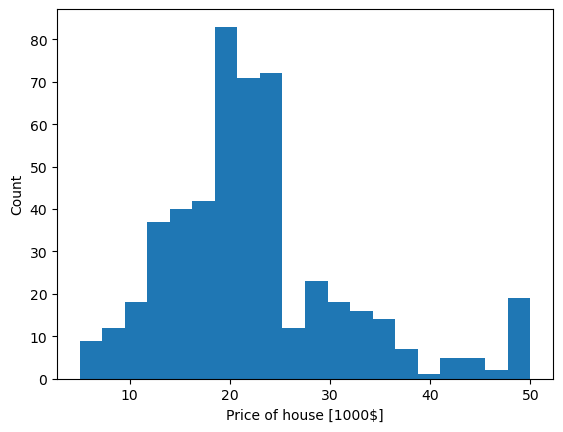

In [50]:
plt.hist(housing.MEDV, bins=20)
plt.xlabel("Price of house [1000$]")
plt.ylabel("Count")
plt.show()

In [51]:
housing['MEDV2'] = housing.MEDV > 25

In [64]:
housing.MEDV2.value_counts(normalize=True)

False    0.754941
True     0.245059
Name: MEDV2, dtype: float64

### Model data

In [53]:
X = housing.drop(columns=['MEDV', 'MEDV2'])
y1 = housing.MEDV
y2 = housing.MEDV2

X.shape, y1.shape, y2.shape

((506, 13), (506,), (506,))

In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(506, 13)

#### Tree classifier

In [71]:
tree_classifier = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
)

tree_classifier.fit(X, y2)

DecisionTreeClassifier()

In [72]:
print(classification_report(y2, tree_classifier.predict(X)))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       382
        True       1.00      1.00      1.00       124

    accuracy                           1.00       506
   macro avg       1.00      1.00      1.00       506
weighted avg       1.00      1.00      1.00       506



In [92]:
# plot_tree(tree_classifier)
# plt.savefig("tree.pdf")

In [94]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
pd.DataFrame({
    "features": features,
    "feature importance": tree_classifier.feature_importances_,
})

,features,feature importance
0,CRIM,0.046390
1,ZN,0.000000
2,INDUS,0.035689
3,CHAS,0.000000
4,NOX,0.016973
5,RM,0.632859
6,AGE,0.016982
7,DIS,0.013371
8,RAD,0.016081
9,TAX,0.061896


Характеристики присъстващи в най-мноог въпроси:

- 63% - RM - average number of rooms per dwelling
- 10% - PTRATIO - pupil-teacher ratio by town
- 6% - TAX - full-value property-tax rate per USD 10,000

#### Tree classifier depth 3

In [81]:
tree_classifier_depth3 = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=3,
)

tree_classifier_depth3.fit(X, y2)

In [83]:
print(classification_report(y2, tree_classifier_depth3.predict(X)))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       382
        True       0.88      0.85      0.86       124

    accuracy                           0.93       506
   macro avg       0.92      0.91      0.91       506
weighted avg       0.93      0.93      0.93       506



In [91]:
# plot_tree(tree_classifier_depth3)
# plt.savefig("tree depth3.pdf")

#### Tree classifier entropy

In [85]:
tree_classifier_entropy = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=3,
)

tree_classifier_entropy.fit(X, y2)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [86]:
print(classification_report(y2, tree_classifier_entropy.predict(X)))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96       382
        True       0.88      0.86      0.87       124

    accuracy                           0.94       506
   macro avg       0.92      0.91      0.91       506
weighted avg       0.94      0.94      0.94       506



## Forest

In [114]:
forest = [
    DecisionTreeClassifier(splitter='random', max_depth=3), 
    DecisionTreeClassifier(splitter='random', max_depth=3), 
    DecisionTreeClassifier(splitter='random', max_depth=3), 
    DecisionTreeClassifier(splitter='random', max_depth=3), 
]

In [115]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [116]:
for each_tree in forest:
    each_tree.fit(X, y)

Различни дървета в гората.

[0.44897312 0.55102688]


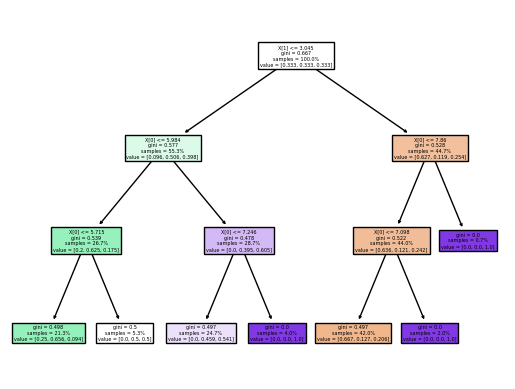

[0.6751926 0.3248074]


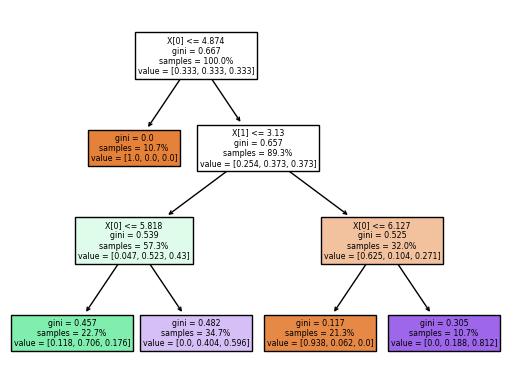

In [122]:
for each_tree in forest[:2]:
    print(each_tree.feature_importances_)    
    plot_tree(each_tree, filled=True, proportion=True)
    plt.show()